In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [22]:
liver_df = pd.read_csv('../data/liver_cirrhosis.csv')

liver_df = liver_df.iloc[0: 20001]

## About Dataset

https://www.kaggle.com/datasets/aadarshvelu/liver-cirrhosis-stage-classification

**Context:**

Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

I have manually cleaned the dataset and used synthetic data to increase samples.

**Attribute Information:**

- __N_Days__: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
- __Status__: status of the patient C (censored), CL (censored due to liver tx), or D (death)
- __Drug__: type of drug D-penicillamine or placebo
- __Age__: age in days
- __Sex__: M (male) or F (female)
- __Ascites__: presence of ascites N (No) or Y (Yes)
- __Hepatomegaly__: presence of hepatomegaly N (No) or Y (Yes)
- __Spiders__: presence of spiders N (No) or Y (Yes)
- __Edema__: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
- __Bilirubin__: serum bilirubin in [mg/dl]
- __Cholesterol__: serum cholesterol in [mg/dl]
- __Albumin__: albumin in [gm/dl]
- __Copper__: urine copper in [ug/day]
- __Alk_Phos__: alkaline phosphatase in [U/liter]
- __SGOT__: SGOT in [U/ml]
- __Tryglicerides__: triglicerides in [mg/dl]
- __Platelets__: platelets per cubic [ml/1000]
- __Prothrombin__: prothrombin time in seconds [s]
- __Stage__: histologic stage of disease ( 1, 2, or 3 )

## Exploratory Data Analysis (EDA)

In [23]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         20001 non-null  int64  
 1   Status         20001 non-null  object 
 2   Drug           20001 non-null  object 
 3   Age            20001 non-null  int64  
 4   Sex            20001 non-null  object 
 5   Ascites        20001 non-null  object 
 6   Hepatomegaly   20001 non-null  object 
 7   Spiders        20001 non-null  object 
 8   Edema          20001 non-null  object 
 9   Bilirubin      20001 non-null  float64
 10  Cholesterol    20001 non-null  float64
 11  Albumin        20001 non-null  float64
 12  Copper         20001 non-null  float64
 13  Alk_Phos       20001 non-null  float64
 14  SGOT           20001 non-null  float64
 15  Tryglicerides  20001 non-null  float64
 16  Platelets      20001 non-null  float64
 17  Prothrombin    20001 non-null  float64
 18  Stage 

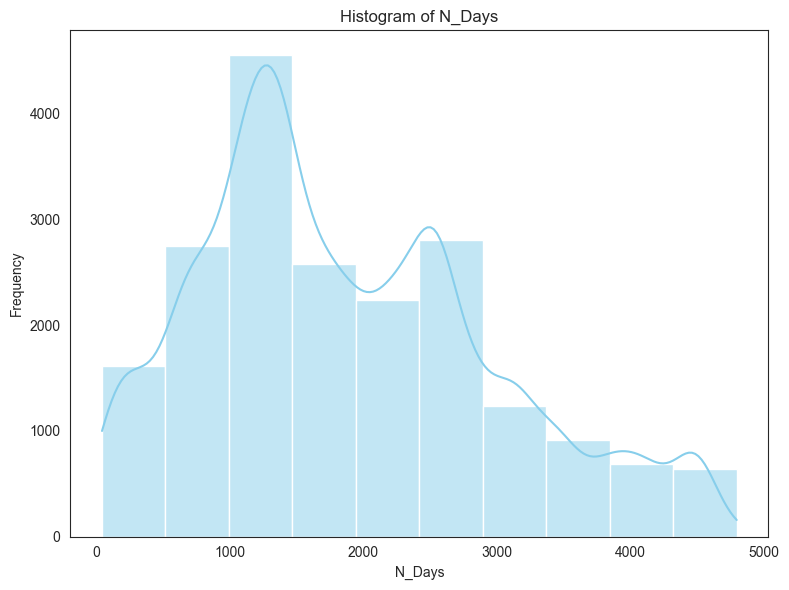

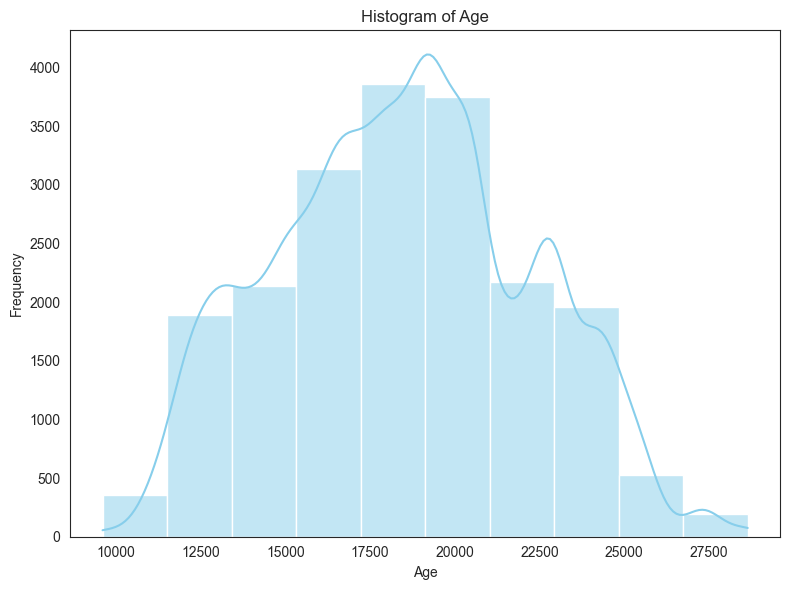

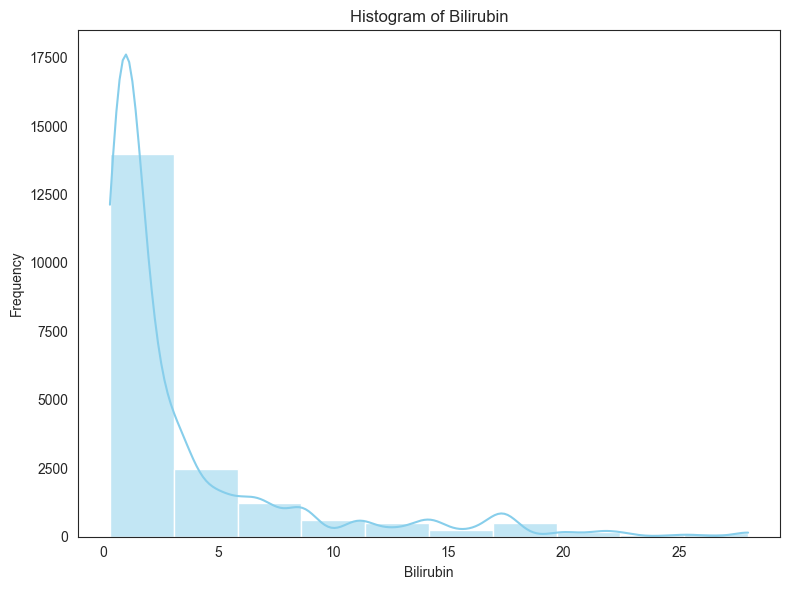

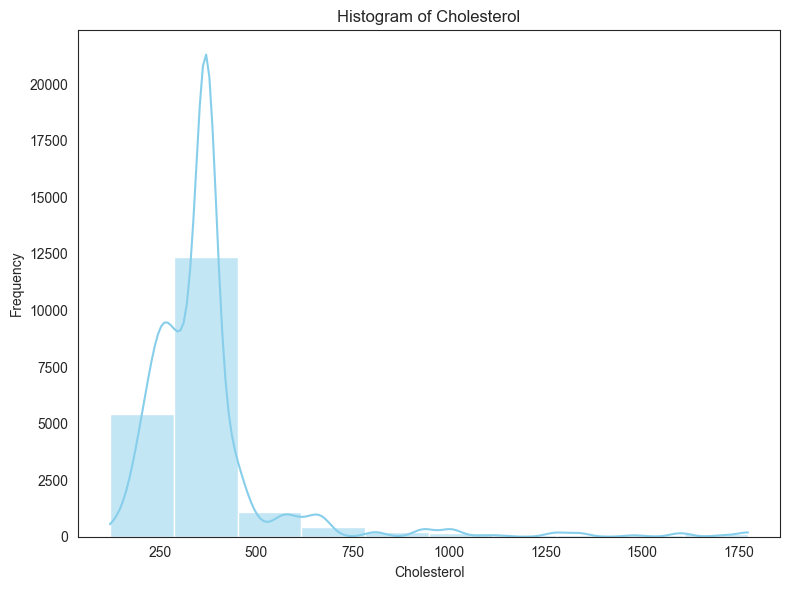

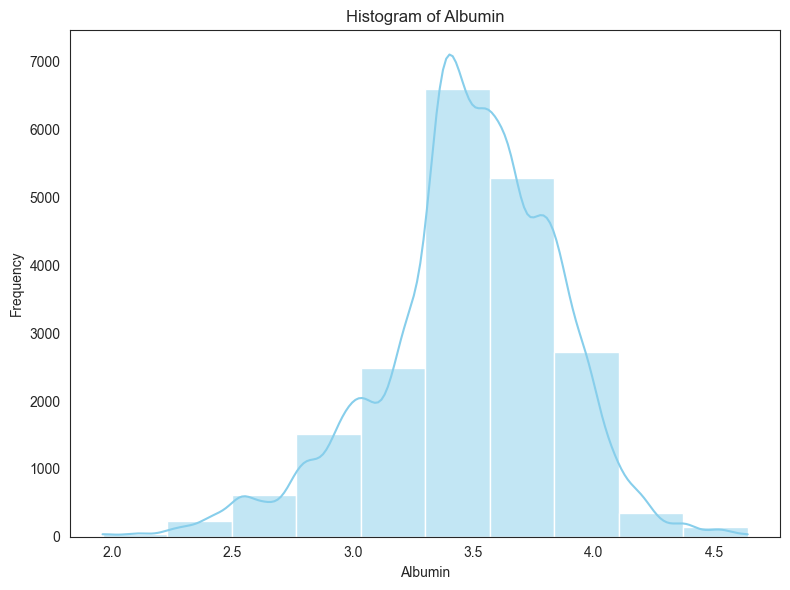

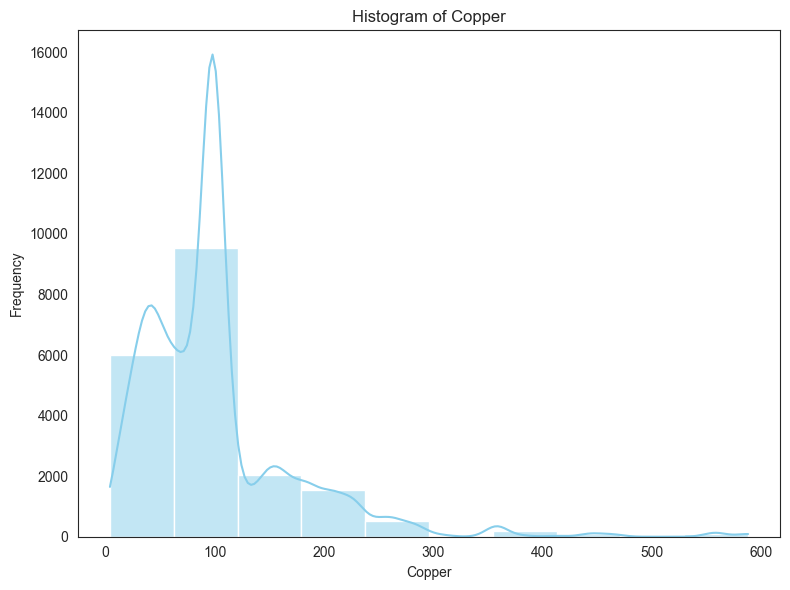

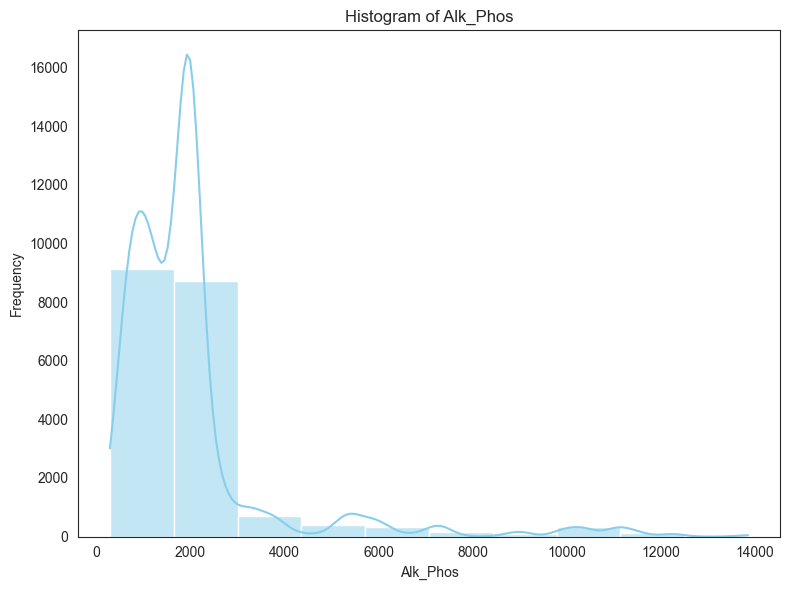

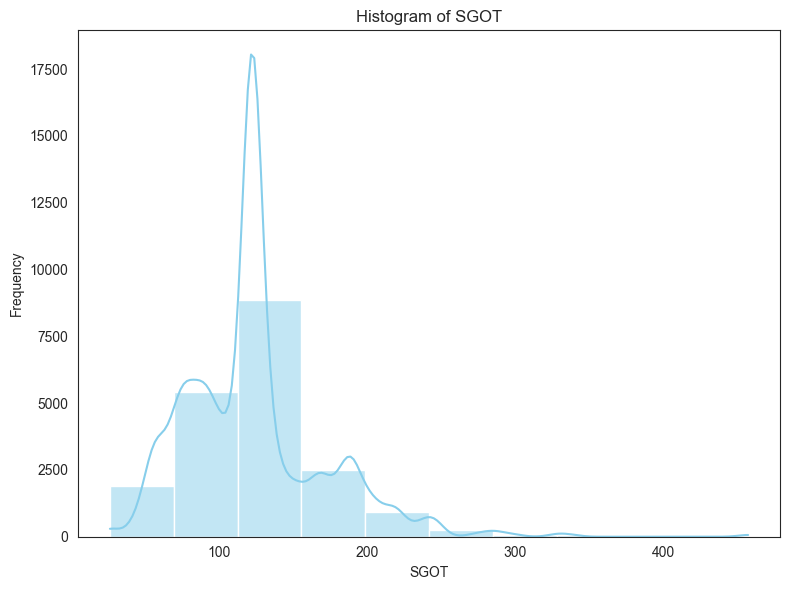

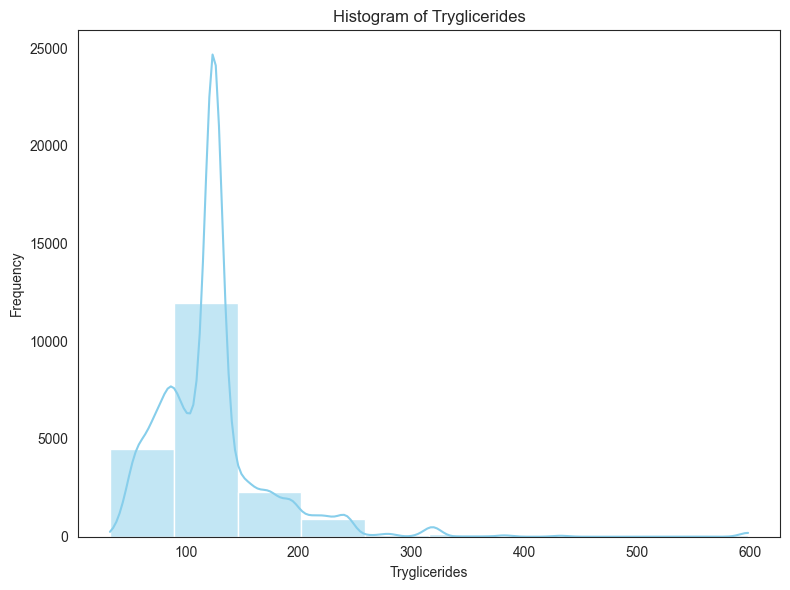

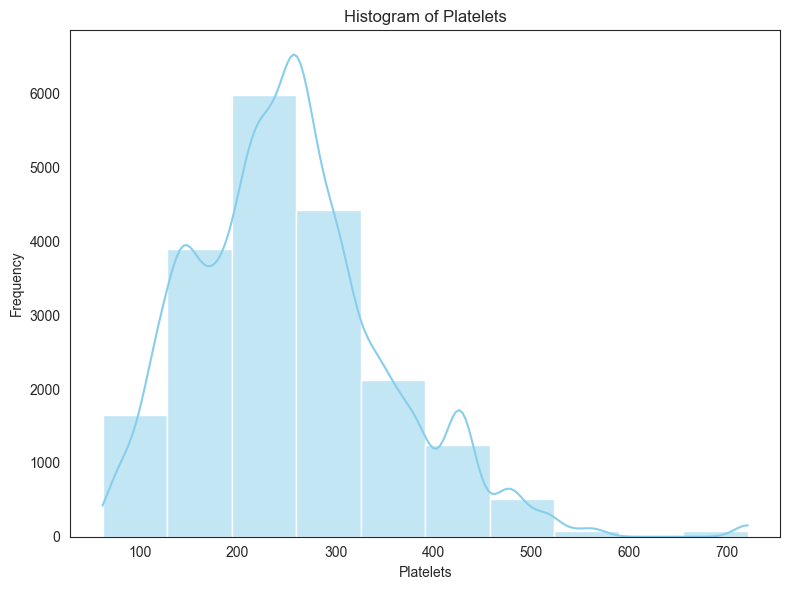

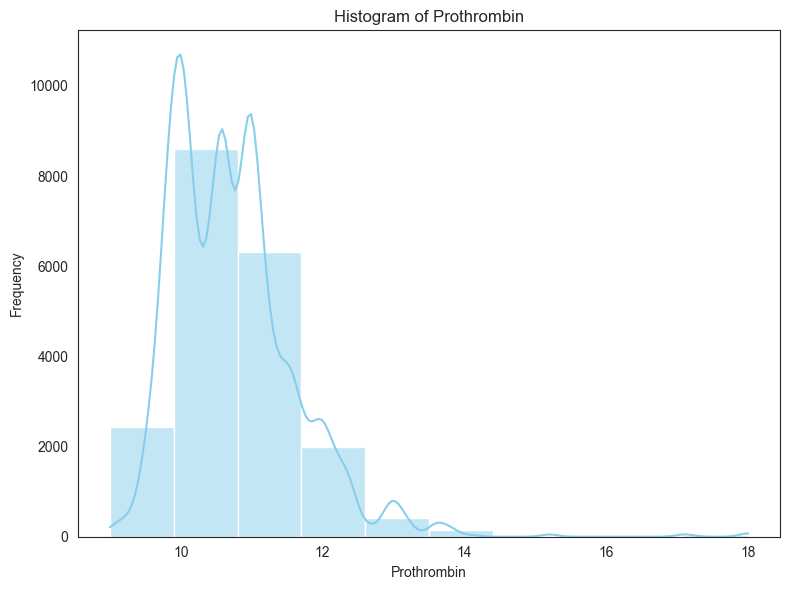

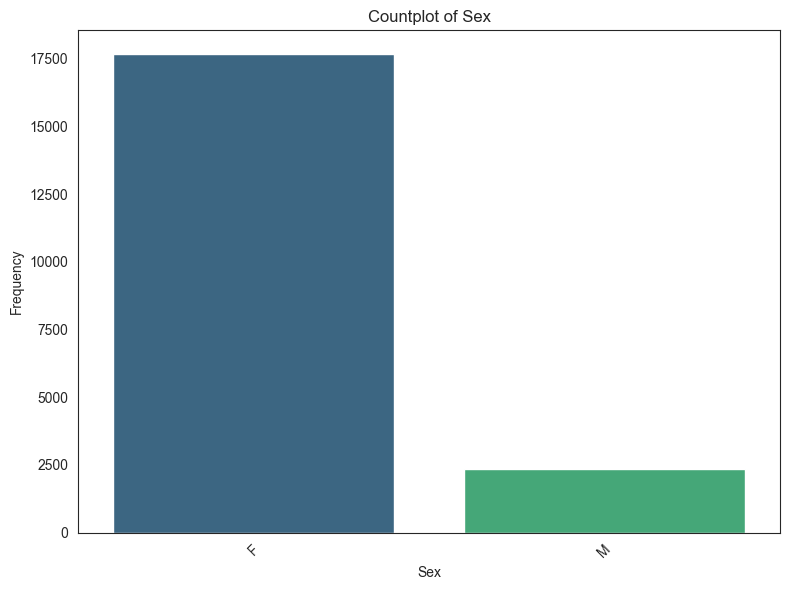

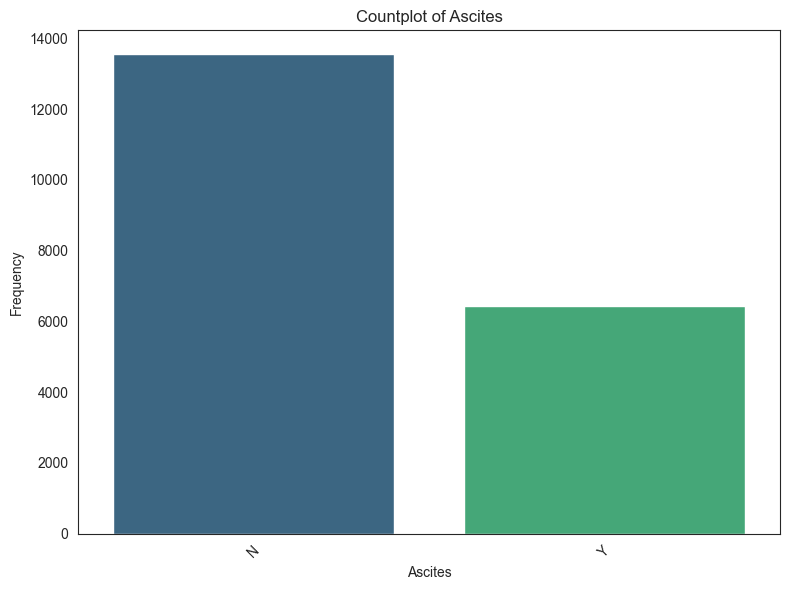

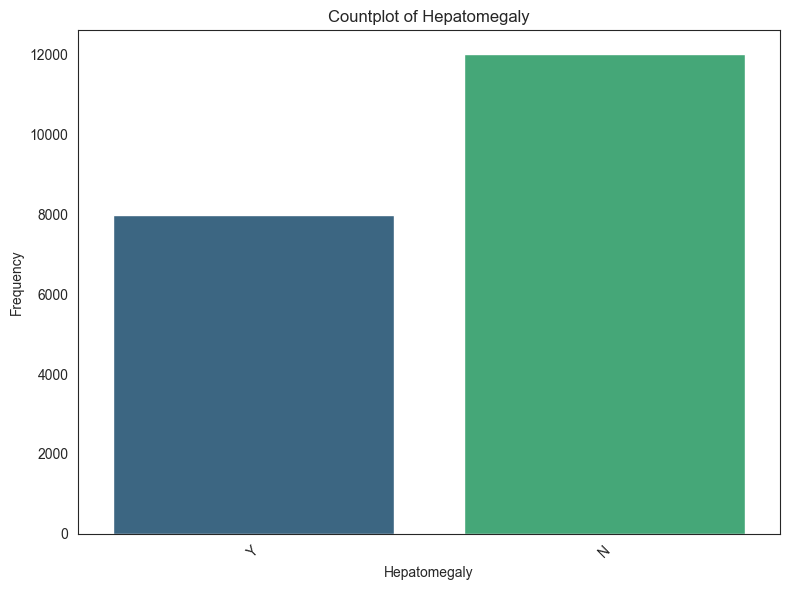

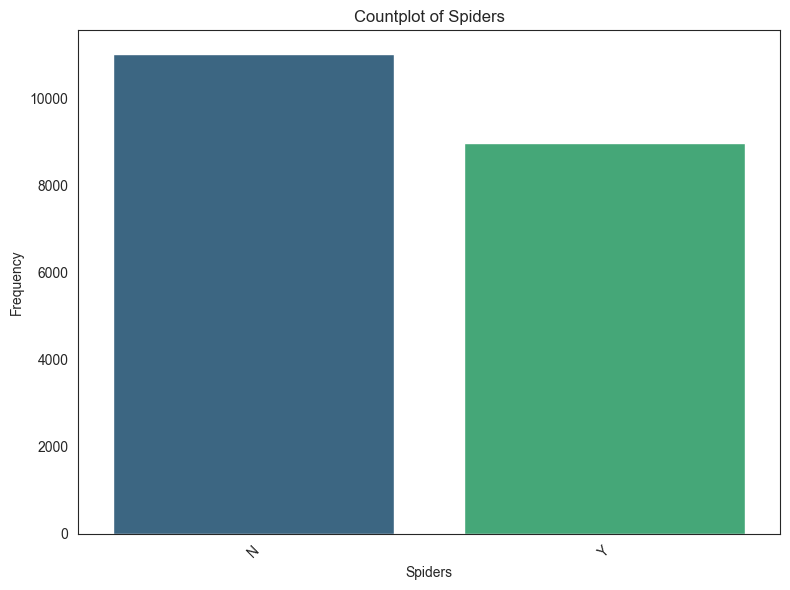

In [24]:
X = liver_df.drop(columns=['Stage'])
y = liver_df['Stage']

num_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

binary_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Membuat histogram untuk kolom numerik
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(liver_df[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

for col in binary_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=liver_df,hue=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [25]:
liver_df['Sex'] = liver_df['Sex'].map({'M': 0, 'F': 1})
liver_df['Ascites'] = liver_df['Ascites'].map({'N': 0, 'Y': 1})
liver_df['Hepatomegaly'] = liver_df['Hepatomegaly'].map({'N': 0, 'Y': 1})
liver_df['Spiders'] = liver_df['Spiders'].map({'N': 0, 'Y': 1})
liver_df['Edema'] = liver_df['Edema'].map({'N': 0, 'S': 1, 'Y': 2})
liver_df['Status'] = liver_df['Status'].astype('category').cat.codes
liver_df['Drug'] = liver_df['Drug'].astype('category').cat.codes

## Drop Duplicate Rows

In [26]:
liver_df.duplicated().sum()

10729

In [27]:
liver_df.drop_duplicates(inplace=True)

print("DataFrame after removing duplicates")
liver_df.info()

DataFrame after removing duplicates
<class 'pandas.core.frame.DataFrame'>
Index: 9272 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         9272 non-null   int64  
 1   Status         9272 non-null   int8   
 2   Drug           9272 non-null   int8   
 3   Age            9272 non-null   int64  
 4   Sex            9272 non-null   int64  
 5   Ascites        9272 non-null   int64  
 6   Hepatomegaly   9272 non-null   int64  
 7   Spiders        9272 non-null   int64  
 8   Edema          9272 non-null   int64  
 9   Bilirubin      9272 non-null   float64
 10  Cholesterol    9272 non-null   float64
 11  Albumin        9272 non-null   float64
 12  Copper         9272 non-null   float64
 13  Alk_Phos       9272 non-null   float64
 14  SGOT           9272 non-null   float64
 15  Tryglicerides  9272 non-null   float64
 16  Platelets      9272 non-null   float64
 17  Prothrombin    9272 

## Outliers

Removing outliers manually

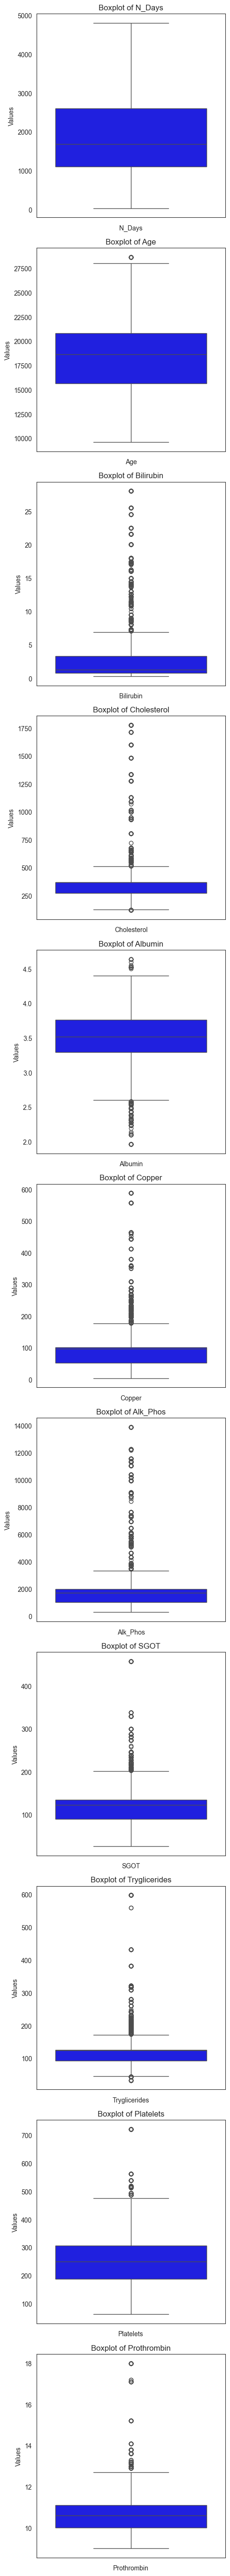

In [28]:
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(5, 5 * len(num_cols)))

for i, feature in enumerate(num_cols):
    sns.boxplot(liver_df[feature], color='blue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [29]:
# N_Days <= 3000
# Age <= 22500
# Bilirubin <= 5
# Cholesterol <= 500
# Albumin >= 3 && Albumin <= 4
# Copper <= 400
# Alk_Phos <= 2000
# SGOT <= 350
# Tryglicerides <= 400
# Platelets <= 300
# Prothombin <= 16

liver_df = liver_df[liver_df['N_Days'] <= 3000]
liver_df = liver_df[liver_df['Age'] <= 22500]
liver_df = liver_df[liver_df['Bilirubin'] <= 5]
liver_df = liver_df[liver_df['Cholesterol'] <= 500]
liver_df = liver_df[(liver_df['Albumin'] >= 3) & (liver_df['Albumin'] <= 4)]
liver_df = liver_df[liver_df['Copper'] <= 400]
liver_df = liver_df[liver_df['Alk_Phos'] <= 2000]
liver_df = liver_df[liver_df['SGOT'] <= 350]
liver_df = liver_df[liver_df['Tryglicerides'] <= 400]
liver_df = liver_df[liver_df['Platelets'] <= 300]
liver_df = liver_df[liver_df['Prothrombin'] <= 16]

liver_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1230,0,1,19724,0,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
3,2090,2,1,16467,1,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,2,1,21699,1,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
9,1012,2,1,22280,0,1,0,1,1,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,259.0,10.1,3
13,2504,0,1,18263,1,1,0,1,0,0.5,120.000000,3.41,53.000000,804.000000,110.050000,52.000000,277.0,10.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,2527,0,0,17664,1,0,0,0,0,0.8,256.000000,3.54,42.000000,1132.000000,74.400000,94.000000,192.0,10.5,2
19993,2168,0,0,21610,1,0,0,0,0,0.5,369.510563,3.68,20.000000,856.000000,55.800000,124.702128,146.0,10.4,2
19994,2286,2,0,18806,1,0,0,0,0,1.8,369.510563,3.64,97.648387,1982.655769,122.556346,124.702128,271.0,9.6,1
19997,2504,0,1,16094,1,0,0,0,0,0.5,120.000000,3.61,53.000000,804.000000,110.050000,52.000000,271.0,10.6,2


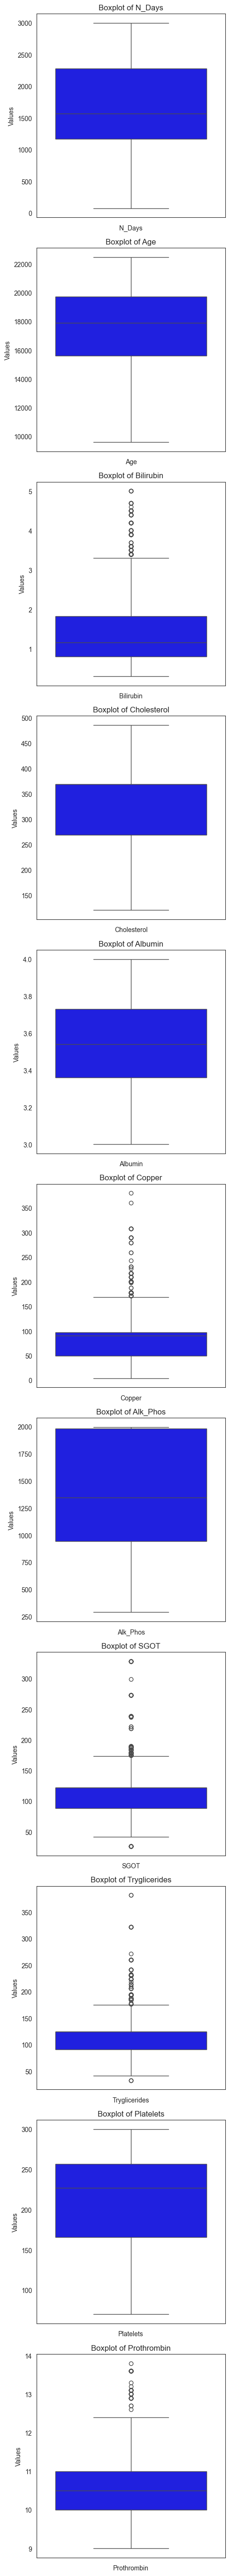

In [30]:
# Create subplots 
fix, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(5, 5 * len(num_cols)))

# Create boxplot for each column
for i, feature in enumerate(num_cols):
    sns.boxplot(liver_df[feature], color='blue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [31]:
liver_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1230,0,1,19724,0,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
3,2090,2,1,16467,1,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,2105,2,1,21699,1,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
9,1012,2,1,22280,0,1,0,1,1,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,259.0,10.1,3
13,2504,0,1,18263,1,1,0,1,0,0.5,120.000000,3.41,53.000000,804.000000,110.050000,52.000000,277.0,10.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,2527,0,0,17664,1,0,0,0,0,0.8,256.000000,3.54,42.000000,1132.000000,74.400000,94.000000,192.0,10.5,2
19993,2168,0,0,21610,1,0,0,0,0,0.5,369.510563,3.68,20.000000,856.000000,55.800000,124.702128,146.0,10.4,2
19994,2286,2,0,18806,1,0,0,0,0,1.8,369.510563,3.64,97.648387,1982.655769,122.556346,124.702128,271.0,9.6,1
19997,2504,0,1,16094,1,0,0,0,0,0.5,120.000000,3.61,53.000000,804.000000,110.050000,52.000000,271.0,10.6,2


## Feature Correlation

Get the Correlation between each feature with the Stage

In [32]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 1 to 19998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         2776 non-null   int64  
 1   Status         2776 non-null   int8   
 2   Drug           2776 non-null   int8   
 3   Age            2776 non-null   int64  
 4   Sex            2776 non-null   int64  
 5   Ascites        2776 non-null   int64  
 6   Hepatomegaly   2776 non-null   int64  
 7   Spiders        2776 non-null   int64  
 8   Edema          2776 non-null   int64  
 9   Bilirubin      2776 non-null   float64
 10  Cholesterol    2776 non-null   float64
 11  Albumin        2776 non-null   float64
 12  Copper         2776 non-null   float64
 13  Alk_Phos       2776 non-null   float64
 14  SGOT           2776 non-null   float64
 15  Tryglicerides  2776 non-null   float64
 16  Platelets      2776 non-null   float64
 17  Prothrombin    2776 non-null   float64
 18  Stage       

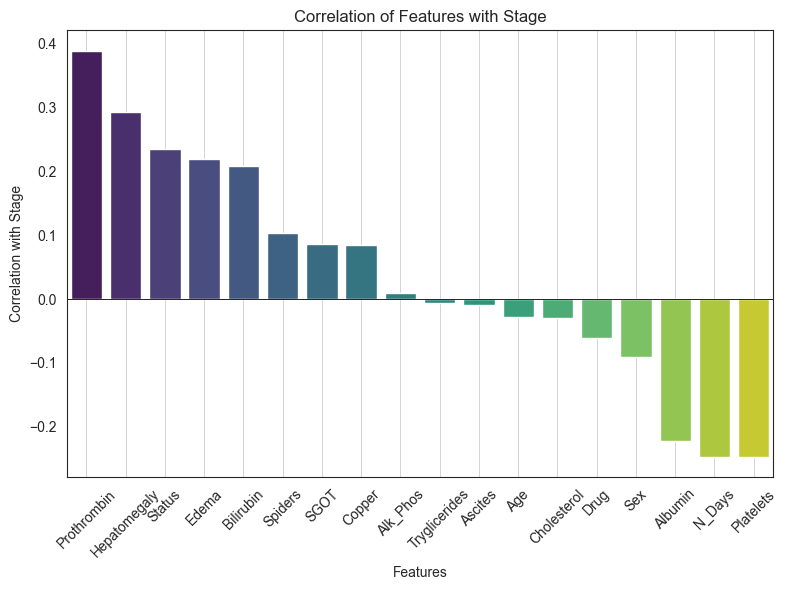

In [33]:
# calculate the correlation matrix with CIRRHOSIS
liver_corr = liver_df.corr()["Stage"]
liver_corr = liver_corr.drop("Stage", axis=0).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.barplot(x=liver_corr.index, hue=liver_corr.index, y=liver_corr, palette='viridis', legend=False)

plt.xlabel("Features")
plt.ylabel("Correlation with Stage")
plt.title("Correlation of Features with Stage")

plt.xticks(rotation=45)

plt.axhline(0, color="k", linewidth=0.6)

plt.grid(True, axis="x", lw=0.6)

plt.tight_layout()

plt.show()

## Heatmap

Correlation between each features

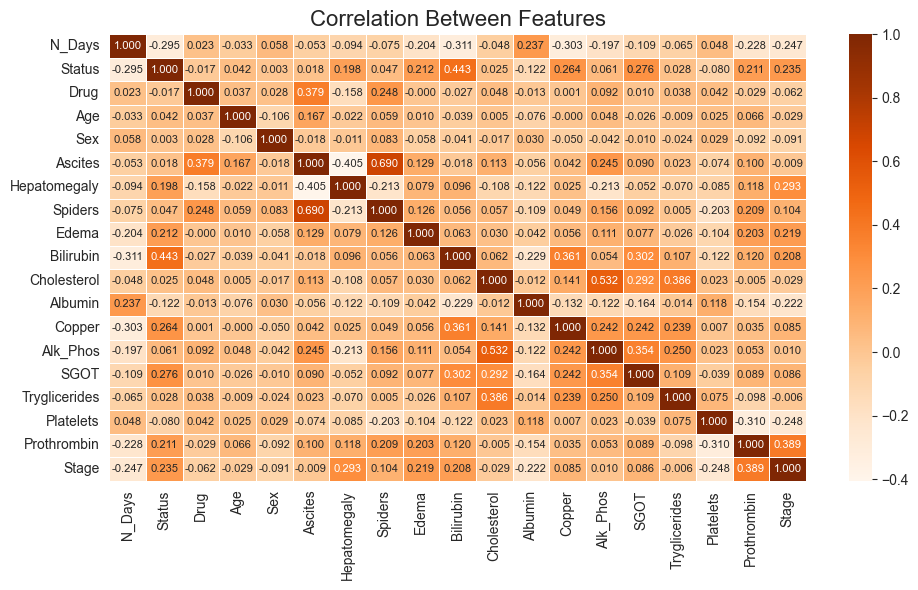

In [34]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.set_style("white")

# Generate the heatmap
sns.heatmap(liver_df.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="Oranges", annot_kws={'size': 8})
plt.title("Correlation Between Features", fontsize=16)
plt.tight_layout()
plt.show()


# Data Sampling

Data sampling is the process of selecting a subset of larger data for the purpose of analysis or model training. With sampling, we can work with smaller data sets that represent the main characteristics of the original data, which can help save time and computing resources.

### Define Features


In [35]:
X = liver_df.drop(columns=['Stage'])
y = liver_df['Stage']

# Feature Scaling

This code snippet standardizes the numerical features using `StandardScaler`. It is particularly beneficial for improving the performance of machine learning algorithms, especially those sensitive to feature scales.

In [36]:
num_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Modeling

This code snippet trains a Decision Tree model using the training data (X_train and y_train). It then makes predictions on the testing data (X_test) and evaluates the model’s performance using various metrics.

- **Accuracy** shows how often a classification ML model is correct overall. 
- **Precision** shows how often an ML model is correct when predicting the target class.
- **Recall** shows whether an ML model can find all objects of the target class. 
- **F1 Score**: F1 score is the harmonic mean of precision and recall and provides a balance between them.

For more details check this link [here](https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=Accuracy%20shows%20how%20often%20a,objects%20of%20the%20target%20class.)

Accuracy Score: 0.74

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.71      0.70       162
           2       0.71      0.72      0.72       210
           3       0.83      0.79      0.81       184

    accuracy                           0.74       556
   macro avg       0.74      0.74      0.74       556
weighted avg       0.74      0.74      0.74       556



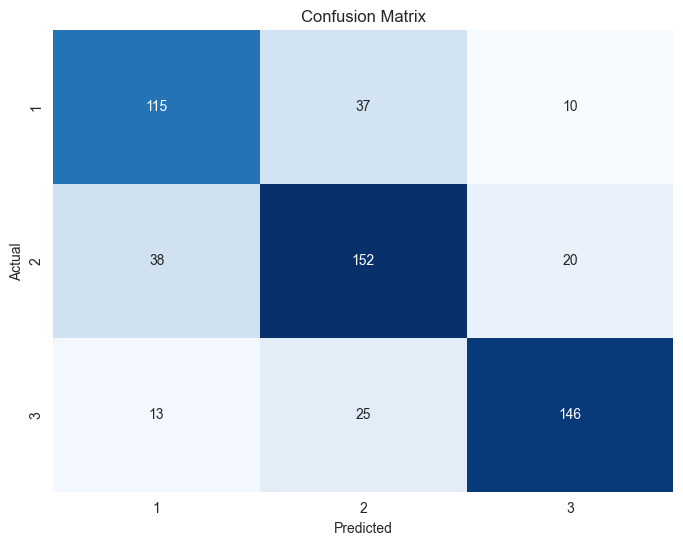

In [37]:
# Perform stratified sampling to maintain the distribution of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = decision_tree.score(X_test, y_test)

# Print accuracy
print("Accuracy Score: {:.2f}".format(accuracy))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
